# Zipf's Law Plotting

Load word counts and plot the results in a paper-friendly format.

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/zipf/count_1w.txt", sep='\t', header=None) # Obtained from https://norvig.com/ngrams/

In [3]:
freq = np.divide(df[1], 100000000000)

In [4]:
df["frequency"] = freq

In [5]:
df_plot = df.drop(columns=1)[:40]

In [6]:
df_plot["rank"] = np.add(df_plot.index.values, 1)

In [7]:
df_plot["zipf"] = np.divide(np.divide(1, df_plot["rank"]), sum(np.divide(1, df_plot["rank"])))

In [8]:
df_plot = df_plot.drop(columns=["rank"])

In [9]:
df_plot = df_plot[[0, "zipf", "frequency"]]

In [10]:
plt.rc('legend',fontsize=20) # using a size in points
#plt.setp(l, linewidth=lws[i])
#plt.rc('legend',fontsize='medium') # using a named size

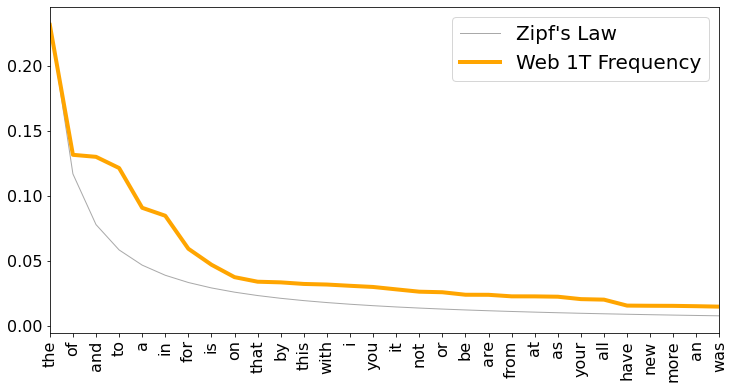

In [14]:
ax = df_plot.plot(colormap=matplotlib.colors.ListedColormap(["darkgrey", "orange"]), figsize=(12, 6), rot=90, xticks=df_plot.index.values, xlim=(0,29))
ax.set_xticklabels(df_plot[0])

lws = [1, 4]
for i, l in enumerate(ax.lines):
    plt.setp(l, linewidth=lws[i])
    
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(['Zipf\'s Law', 'Web 1T Frequency'])